# Analysis of students' performance

We start by importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, classification_report

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
edu_df = pd.read_csv('education.csv')

Let's look at the data.

In [3]:
edu_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
edu_df.shape

(480, 17)

In [5]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.9+ KB


In [6]:
edu_df.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

So there is no null value in the data and also most of the features are categorical in nature. 

## Exploratory Data Analysis

The first question that we ask is - **Where do the students currently enrolled in the online classes come from? What are the male to female ratios?**

The attributes that will help us to find answers to these are - 'NationalITy', 'PlaceofBirth' and 'gender'.

In [7]:
edu_df['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [8]:
edu_df['PlaceofBirth'].unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

Both of these attributes basically carry the same information and hence we drop one of them.

In [9]:
edu_df.drop('NationalITy', axis=1, inplace=True)

In [10]:
edu_df.columns

Index(['gender', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
       'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

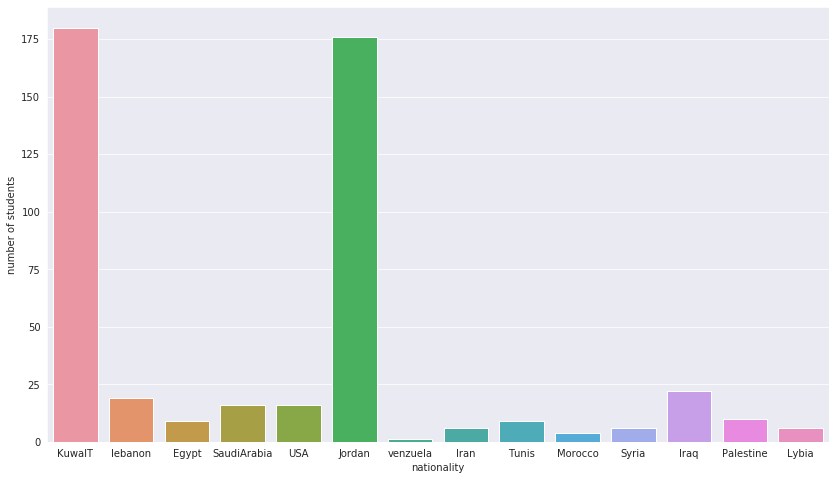

In [11]:
plt.figure(figsize=(14,8))
sns.countplot('PlaceofBirth', data=edu_df)
plt.xlabel('nationality')
plt.ylabel('number of students');

From the above plot, we see that most of the enrollments are from Kuwait and Jordon. Although most of the students come from middle east countries, interestingly there are some enrollments from the united states.

Next we look at the male to female ratio for each of these countries.

In [12]:
sorted_place = edu_df['PlaceofBirth'].value_counts().index

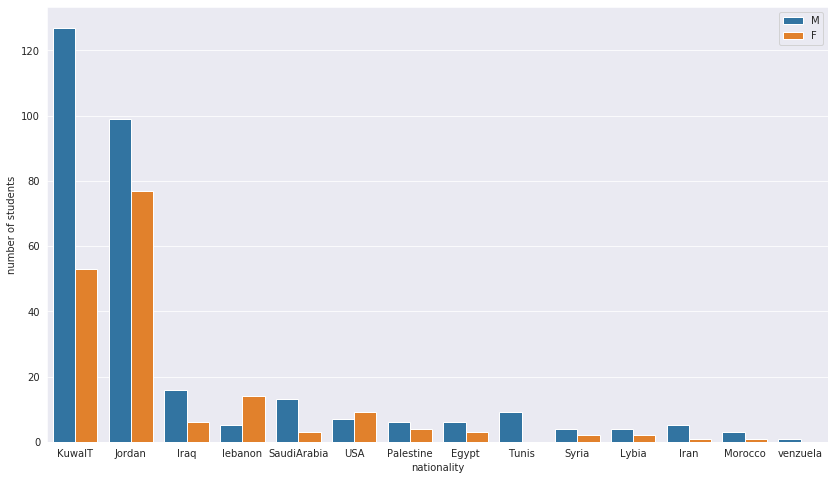

In [13]:
plt.figure(figsize=(14,8))
sns.countplot('PlaceofBirth', hue='gender', data=edu_df, order=sorted_place)
plt.xlabel('nationality')
plt.ylabel('number of students')
plt.legend(loc='upper right');

On average, the number of female students as compared to male students is quite low. In case of Lebanon, number of female enrollment is almost double that of male enrollments and in case of USA, it is slightly higher.

The next question of interest might be - **what is the general distribution of education levels of students? Is there any gender bias?**

The attributes 'StageID' and 'gender' will help us to find the answers.

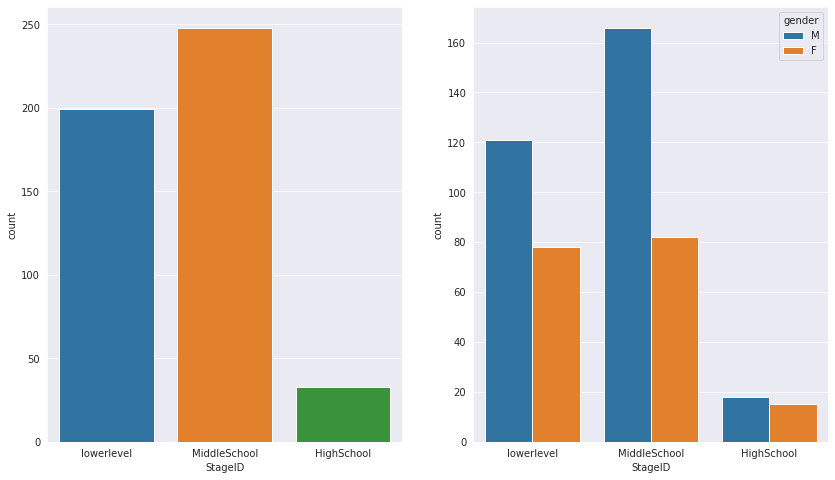

In [14]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.countplot('StageID', data=edu_df, ax=ax[0])
sns.countplot('StageID', hue='gender', data=edu_df, ax=ax[1]);

Most of the students are from middle school. An interesting point to note is that, numbers of male and female students coming from high school are almost comparable.

**What are the popular topics among students?**

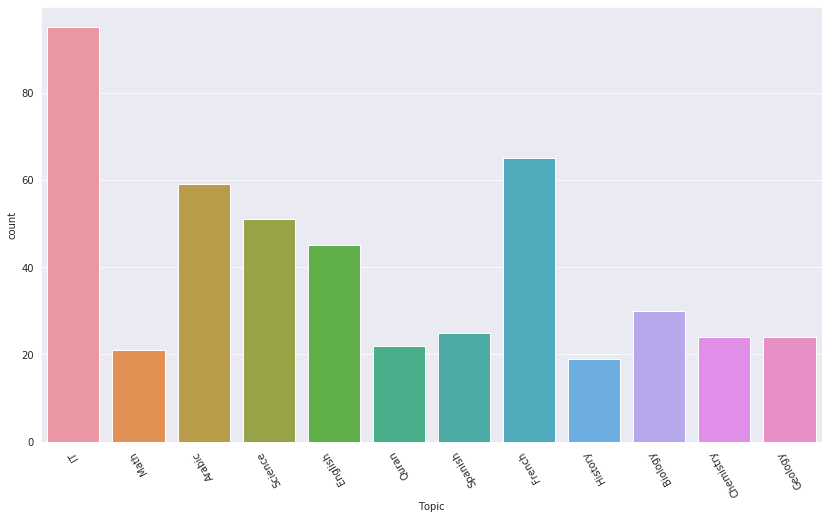

In [15]:
labels = edu_df['Topic'].unique()

plt.figure(figsize=(14,8))
f = sns.countplot('Topic', data=edu_df)
f.set_xticklabels(labels=labels, rotation=120);

So most of the students have enrolled for IT. Interestingly, next popular topics are two languages - French and Arabic.

Another interesting point might be to see **whether there is any influence coming from the background of a student on topic selection.**

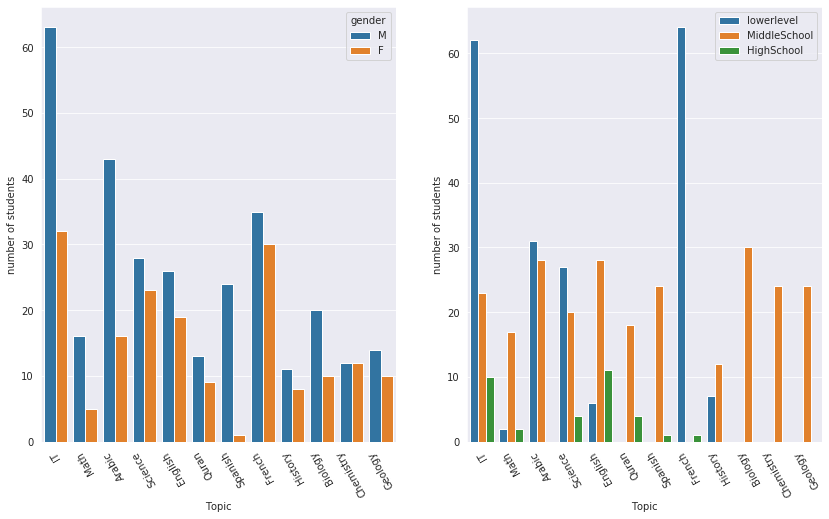

In [16]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.countplot('Topic', hue='gender', data=edu_df, ax=ax[0])
sns.countplot('Topic', hue='StageID', data=edu_df, ax=ax[1])
ax[0].set_ylabel("number of students")
ax[1].set_ylabel("number of students")
ax[0].set_xticklabels(labels=labels, rotation=120)
ax[1].set_xticklabels(labels=labels, rotation=120)
ax[1].legend(loc='upper right');

Chemistry seems to be equally popular among both female and male students. Students enrolled for biology, chemistry and geology are from middle school only.

Next we check **how popular the topics are in different countries that the students come from.** We look at some countries with high enrollment numbers.

In [17]:
topic_order = edu_df['Topic'].value_counts().index

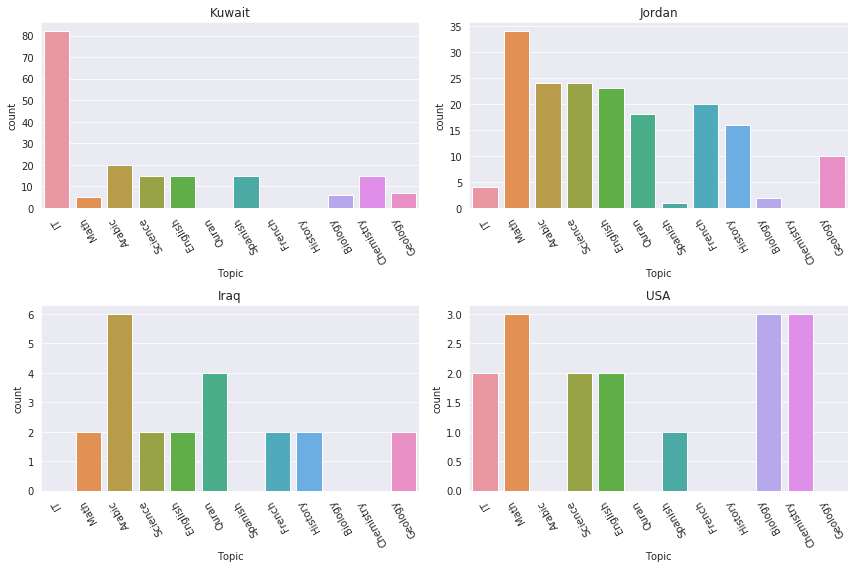

In [18]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.countplot(edu_df.query('PlaceofBirth=="KuwaIT"')['Topic'], ax=ax[0,0], order=topic_order)
sns.countplot(edu_df.query('PlaceofBirth=="Jordan"')['Topic'], ax=ax[0,1], order=topic_order)
sns.countplot(edu_df.query('PlaceofBirth=="Iraq"')['Topic'], ax=ax[1,0], order=topic_order)
sns.countplot(edu_df.query('PlaceofBirth=="USA"')['Topic'], ax=ax[1,1], order=topic_order)
ax[0,0].set_xticklabels(labels=labels, rotation=120)
ax[0,1].set_xticklabels(labels=labels, rotation=120)
ax[1,0].set_xticklabels(labels=labels, rotation=120)
ax[1,1].set_xticklabels(labels=labels, rotation=120)
ax[0,0].set_title('Kuwait')
ax[0,1].set_title('Jordan')
ax[1,0].set_title('Iraq')
ax[1,1].set_title('USA')
plt.tight_layout();

Quite a few things to observe here :

- IT has the highest demand in Kuwait (also highest among the four countries shown above).
- Math is the most popular topic in Jordan.
- No student from Iraq has taken IT.
- There is a comparable demand of math, biology and chemistry in USA.

Next we ask the question, **what factors affect the grade of a student?** Note that the grade of a student is directly related to the 'class' the student belongs to.

The attributes of interest to find answer to this question are:
1. raisedhands
2. VisITedResources
3. AnnouncementsView
4. Discussion
5. StudentAbsenceDays

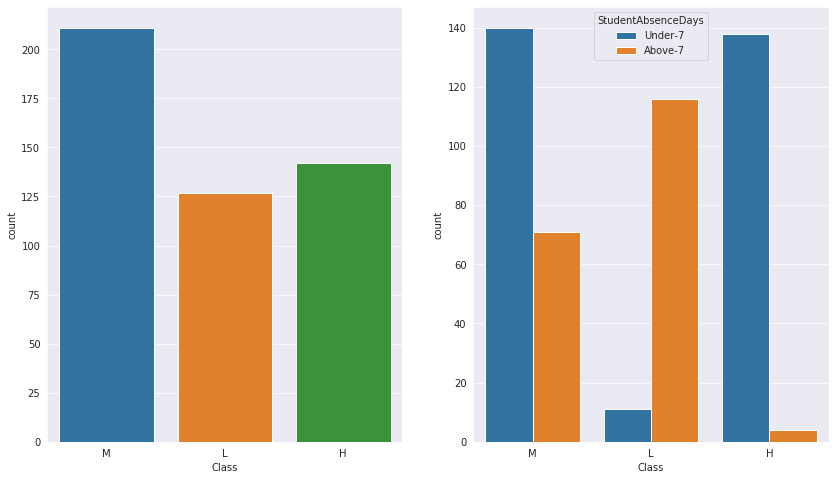

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))
sns.countplot('Class', data=edu_df, ax=ax[0])
sns.countplot('Class', hue='StudentAbsenceDays', data=edu_df, ax=ax[1]);

So most of the students belong to 'middle level' with scores in the range 70-89. Students in 'high level' have high attendance rate whereas those in 'low level' have the lowest attendance rate. 

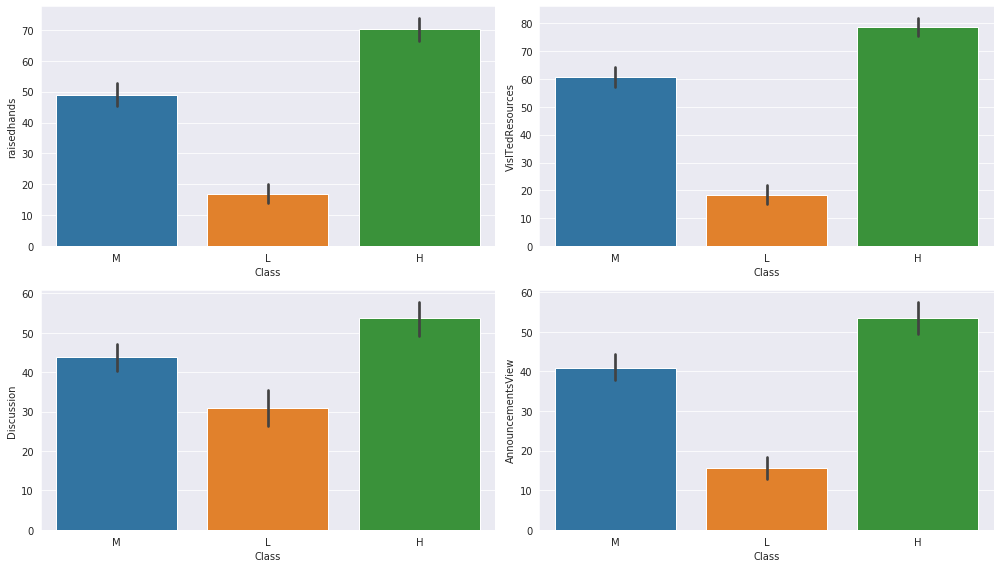

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(14,8))
sns.barplot(x='Class', y='raisedhands', data=edu_df, ax=ax[0,0])
sns.barplot(x='Class', y='VisITedResources', data=edu_df, ax=ax[0,1])
sns.barplot(x='Class', y='Discussion', data=edu_df, ax=ax[1,0])
sns.barplot(x='Class', y='AnnouncementsView', data=edu_df, ax=ax[1,1])
plt.tight_layout();

It is clear from the above plots that students who are more involved in the classroom activities generally score high marks. Another interesting observation could be **how female students perform compared to male student?**

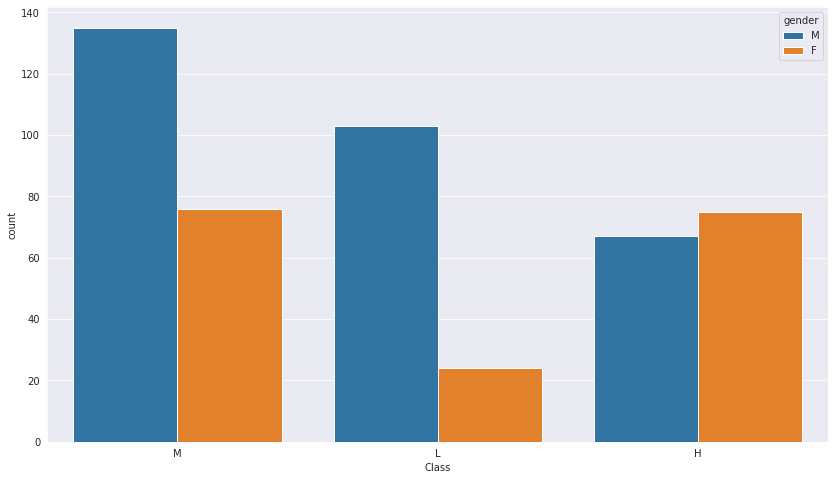

In [21]:
plt.figure(figsize=(14,8))
sns.countplot('Class', hue='gender', data=edu_df);

As we can see from the above plot, female students tend to have higher performance scores as compared to male students.

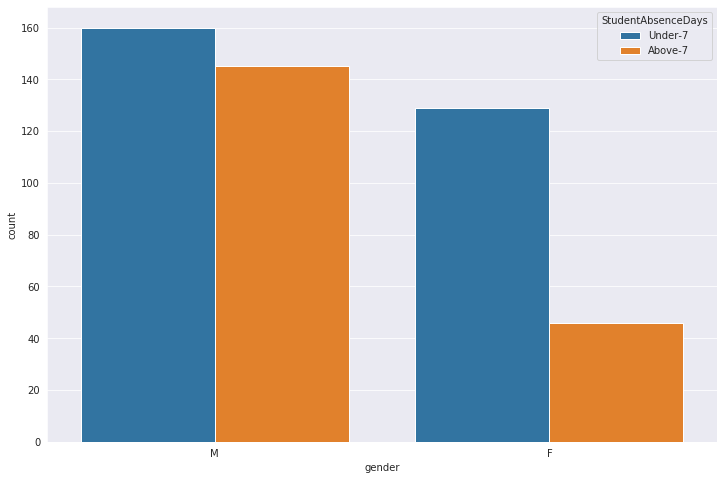

In [22]:
plt.figure(figsize=(12,8))
sns.countplot('gender', hue='StudentAbsenceDays', data=edu_df);

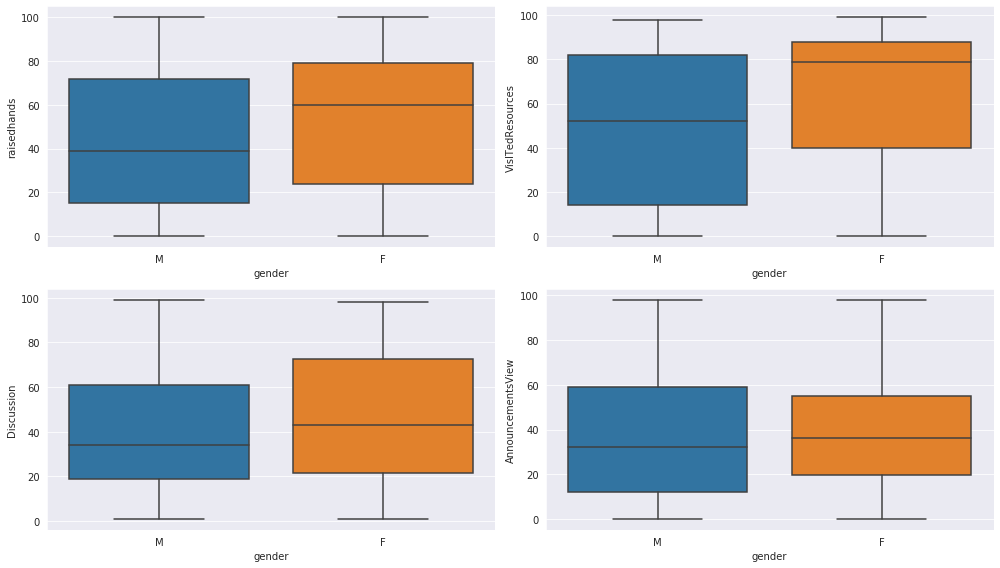

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(14,8))
sns.boxplot(x='gender', y='raisedhands', data=edu_df, ax=ax[0,0])
sns.boxplot(x='gender', y='VisITedResources', data=edu_df, ax=ax[0,1])
sns.boxplot(x='gender', y='Discussion', data=edu_df, ax=ax[1,0])
sns.boxplot(x='gender', y='AnnouncementsView', data=edu_df, ax=ax[1,1])
plt.tight_layout();

Few points to note from the above plots:

1. Female students have a better attendance rate.
2. Also they are generally more involved in the classroom activities as compared to fellow male students.

This also explains why female students generally score higher than male students. Note that, this is also in line with our general observation.

The attributes 'SectionID', 'StageID' and 'Semester' might also be related to a student's performance. We investigate that below.

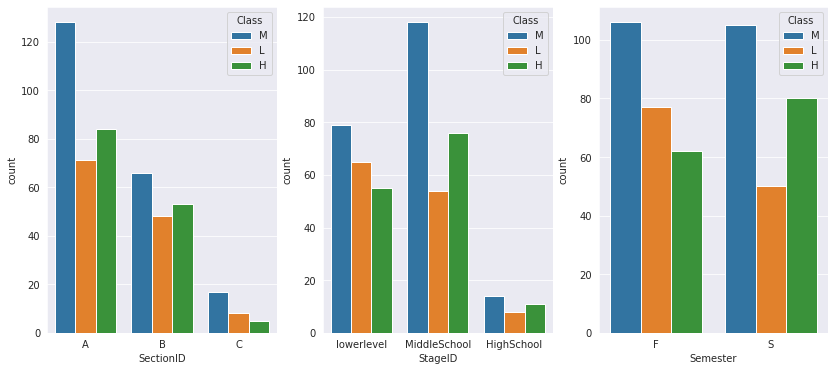

In [24]:
fig, ax = plt.subplots(1,3, figsize=(14,6))
sns.countplot('SectionID', hue='Class', data=edu_df, ax=ax[0])
sns.countplot('StageID', hue='Class', data=edu_df, ax=ax[1])
sns.countplot('Semester', hue='Class', data=edu_df, ax=ax[2]);

Couple of interesting points to note here are:

1. Students of section A have shown an overall better performance and very few students from section C have scored high marks.
2. Students coming from middle school have have the highest number of 'middle-level' and 'high-level' grades. In case of high school, these two numbers are almost comparable.
3. There is a decrease in number of 'low-level' grades and a corresponding increase in number of 'high-level' grades in second semester. That means, as students transit from first to second semester, they generally give a better performance.

**How students perform in different topics?**

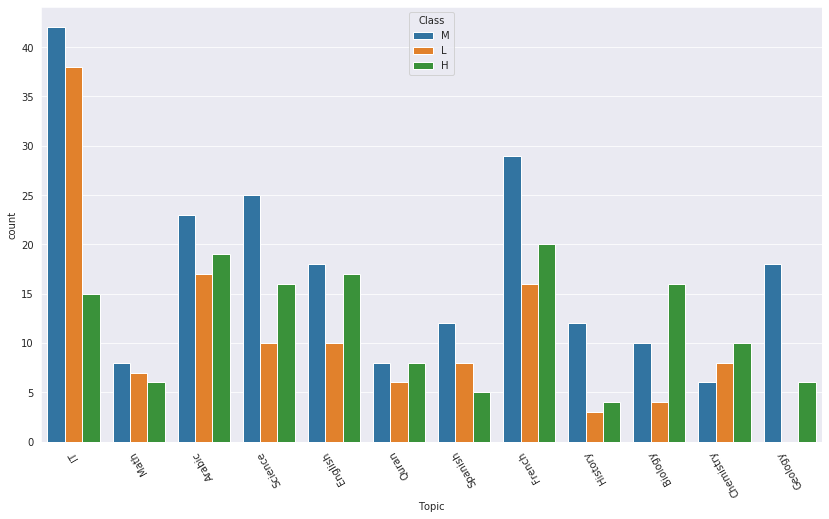

In [25]:
plt.figure(figsize=(14,8))
f = sns.countplot('Topic', hue='Class', data=edu_df)
f.set_xticklabels(labels=labels, rotation=120);

Although IT has maximum number of enrollments, the overall performance of students in this course is poor as compared to others since the number of students with high marks are significantly lower than that with low and average marks (which are almost comparable in this case). In subjects like biology and chemistry, most of the students have scored high marks. Also in gelogy, there is no student with low score. 

Let's now see **how much parents are satisfied with each school of study.**

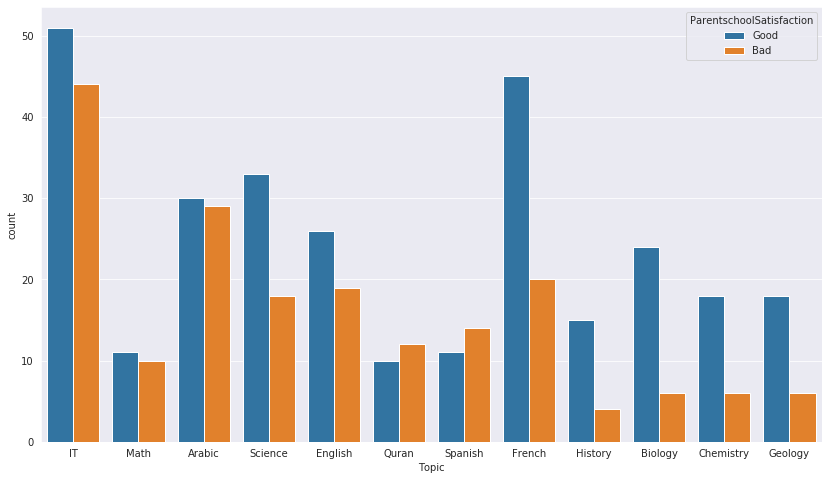

In [26]:
plt.figure(figsize=(14,8))
sns.countplot('Topic', hue='ParentschoolSatisfaction', data=edu_df);

One interesting point to note is that the most popular course IT has received almost comparable number of good and bad reviews. Courses like chemistry, biology have got significantly more number of positive feedbacks from parents. Looking at the last two plots, it seems that parents voting for each of the school of studies have been affected by the performance of their children in those courses.

It will be interesting to monitor how all these factors affect students to take up a particular course in the future. Also studying this data closely is extremely important for the organization to expand its business, *e.g.*, understanding which topics are more popular among students and also in different countries, introducing new methods to engage more students in the classroom activities which will help them to perform better and in turn attract more students to enroll, improving structures of the courses in which students have not performed well and also have got comparatively poor reviews and so on.

## Building a classification model 

In this section, we will build a simple model which, given a bunch of features related to a student, will be able to predict how the student will perform.

In [28]:
X = edu_df.drop('Class', axis=1)
X.head()

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7
1,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7
2,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7
3,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7
4,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7


In [29]:
y = edu_df['Class']

So, X is our **feature matrix** and y is the **target variable**.

Let's now convert all the categorical variables into dummy variables.

In [30]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


So we have total 47 features to train our model on. Let's split our dataset into train and test sets. 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train.shape, X_test.shape

((384, 47), (96, 47))

Before building the model, let's find out how the target classes are distributed in the dataset. This is crucial to understand in order to choose the evaluation metric to test the model's performance.

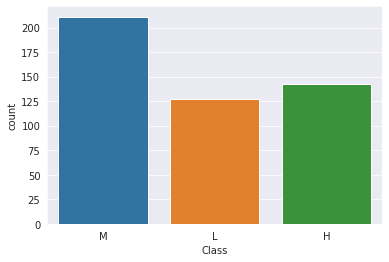

In [34]:
sns.countplot('Class', data=edu_df);

So from the above plot it is clear that when the dataset can be considered to be moderately balanced. Hence, accuracy score can be a good metric in this case.

The first classification algorithm that we use is k nearest neighbors. One important hyper-parameter of this algorithm is n_neighbors which is the number of nearest neighbors to be considered when performing the classification. To find out the optimum value of this parameter in our case, let's generate a plot of test accuracy as a function of n_neighbors.

In [41]:
# consider n_neighbors in the range (1,50)
n_neighbors = range(50)
accuracy_list = []

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n+1)
    # fit on the training set
    knn.fit(X_train, y_train)
    # predict on the test set
    pred = knn.predict(X_test)
    # calculate the accuracy score on the test set
    accuracy = accuracy_score(y_test, pred)
    # store the value
    accuracy_list.append(accuracy)

Text(0, 0.5, 'accuracy score')

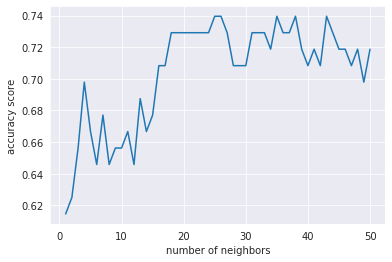

In [42]:
plt.plot(range(1,51), accuracy_list)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy score')

As can be seen from the above plot, approximately n_neighbors = 26 gives the best accuracy result and we will choose this value to train our model.

In [43]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

In [44]:
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_true=y_test, y_pred=knn_pred)
print("The accuracy score for KNN algorithm is {}".format(knn_accuracy))

The accuracy score for KNN algorithm is 0.7395833333333334


The next classification algorithm that we consider is random forest clasiification. To find the optimum value of the hyper-parameter n_estimators (*i.e*. the number of trees to be conisdered during the classification) in this case, we follow the simialr strategy as above.

In [45]:
# consider n_estimators in the range (10,200)
n_estimators = range(0,210,10)
accuracy_list = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n+1)
    # fit on the training set
    rf.fit(X_train, y_train)
    # predict on the test set
    pred = rf.predict(X_test)
    # calculate the accuracy score on the test set
    accuracy = accuracy_score(y_test, pred)
    # store the value
    accuracy_list.append(accuracy)

Text(0, 0.5, 'accuracy score')

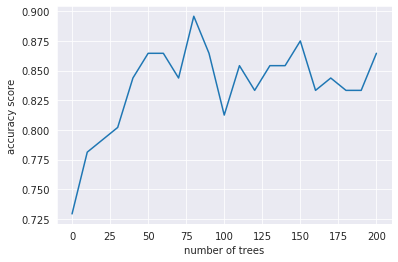

In [46]:
plt.plot(range(0,210,10), accuracy_list)
plt.xlabel('number of trees')
plt.ylabel('accuracy score')

Therefore, n_estimators ~ 78 gives best accuracy score as evaluated on the test set and hence we will use this value to train our model. 

In [47]:
rf = RandomForestClassifier(n_estimators=78)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=78,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_true=y_test, y_pred=rf_pred)
print("The accuracy score for random forest algorithm is {}".format(rf_accuracy))

The accuracy score for random forest algorithm is 0.84375


We will perform a grid search over a range of some hyper-parameters for the classification algorithms logistic regression and support vector machine to find out which algorithm works best in the present case and for what choice of parameters.

Below we define a list of algorithms and a corresponding list of parameter regions that will be used in gridsearching.

In [49]:
model_list = [LogisticRegression(), SVC()]

param_dict = [
              {'C': [0.1, 0.5, 1.0]},
              {'kernel': ['rbf', 'linear', 'sigmoid', 'poly']}
             ]

And we run a loop over them.

In [54]:
for model, param in zip(model_list, param_dict):
    grid_cv = GridSearchCV(estimator=model, param_grid=param, verbose=3)
    print("the current estimator is : {}".format(model))
    grid_cv.fit(X_train, y_train)
    print()
    print("the best score on the training set is : {} for the parameter {}".format(grid_cv.best_score_, 
                                                                                   grid_cv.best_params_))
    print()

the current estimator is : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.714, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.753, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.701, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.740, total=   0.0s
[CV] C=0.1 ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

[CV] ............................... C=0.5, score=0.753, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.805, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.714, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.766, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.605, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.714, total=   0.0s
[CV] C=1.0 ...........................................................


/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://

[CV] ............................... C=1.0, score=0.805, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.779, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.740, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.618, total=   0.0s

the best score on the training set is : 0.7314764183185236 for the parameter {'C': 1.0}

the current estimator is : SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] kernel=rbf ......................................................
[CV] 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.1s finished



the best score on the training set is : 0.7263841421736158 for the parameter {'kernel': 'linear'}



In [55]:
print("The overall best estimator is {} with parameter {} and it produces a cross-validated score {} on the training set".
      format(grid_cv.best_estimator_, grid_cv.best_params_, grid_cv.best_score_))

The overall best estimator is SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) with parameter {'kernel': 'linear'} and it produces a cross-validated score 0.7263841421736158 on the training set


Let's use this model to make predictions on the test set.

In [56]:
pred = grid_cv.predict(X_test)

Below we print the classification report of our test set.

In [57]:
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           H       0.87      0.83      0.85        24
           L       0.81      0.96      0.88        26
           M       0.88      0.80      0.84        46

    accuracy                           0.85        96
   macro avg       0.85      0.87      0.86        96
weighted avg       0.86      0.85      0.85        96



Therefore, the SVC model with linear kernel produces an accuracy score of 0.85 on the test data which is the highest accuracy score among all the algorithms that we have tried here. 